# Simple Linear Regression

## Objectives

*   Use scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model

Importing Relevant Packages 

In [1]:


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.facecolor'] = '#00000000'




Importing the dataset

In [4]:
df = pd.read_csv('Fuel consumption 2019.csv')

Let's first have a descriptive exploration on our data

In [5]:
df.head()


,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


In [6]:
df.describe()

,Model-Year,Engine-Size,Cylinders,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
count,1046.0,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,2019.0,3.108795,5.595602,12.378011,9.038050,10.872562,251.312620
std,0.0,1.315989,1.796845,3.294286,2.049742,2.697321,57.017573
min,2019.0,1.000000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2019.0,2.000000,4.000000,10.200000,7.600000,9.100000,212.250000
50%,2019.0,3.000000,6.000000,12.050000,8.800000,10.600000,248.000000
75%,2019.0,3.600000,6.000000,14.300000,10.200000,12.575000,289.000000
max,2019.0,8.000000,16.000000,26.800000,17.200000,22.200000,522.000000


Selecting some features to explore more

In [7]:
select_df = df[['Engine-Size','Cylinders','Fuel-Consumption-Comb','CO2-Emissions']]
select_df.head()

,Engine-Size,Cylinders,Fuel-Consumption-Comb,CO2-Emissions
0,2.4,4,8.6,199
1,3.5,6,10.8,252
2,3.5,6,11.0,258
3,3.0,6,9.0,210
4,3.5,6,11.0,261


Plotting the features 

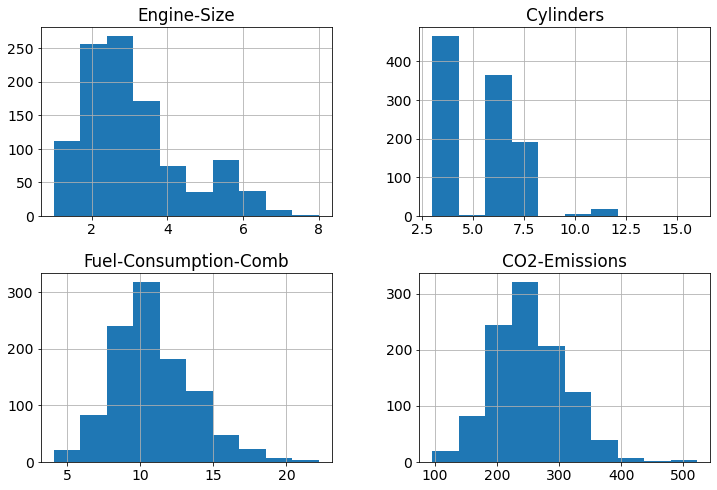

In [8]:
select_df.hist()
plt.show()

Plotting each of these features against the Emission, to see how linear their relationship is:

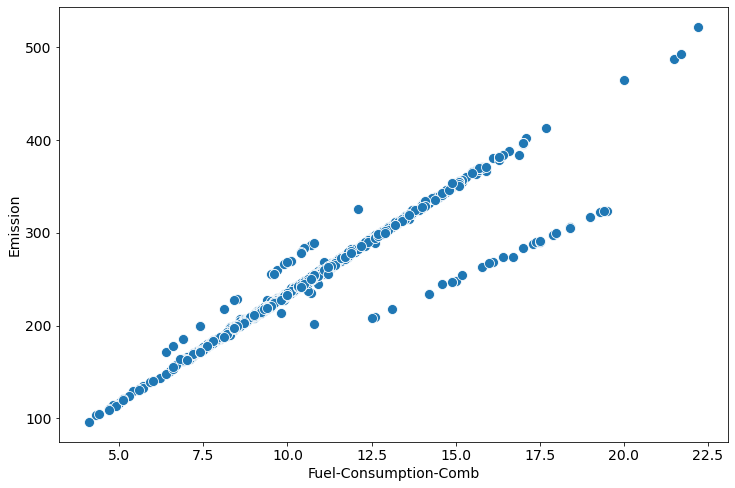

In [9]:
sns.scatterplot(x = 'Fuel-Consumption-Comb' , y = 'CO2-Emissions' ,s=100 , data = df);
plt.xlabel("Fuel-Consumption-Comb")
plt.ylabel("Emission")
plt.show()

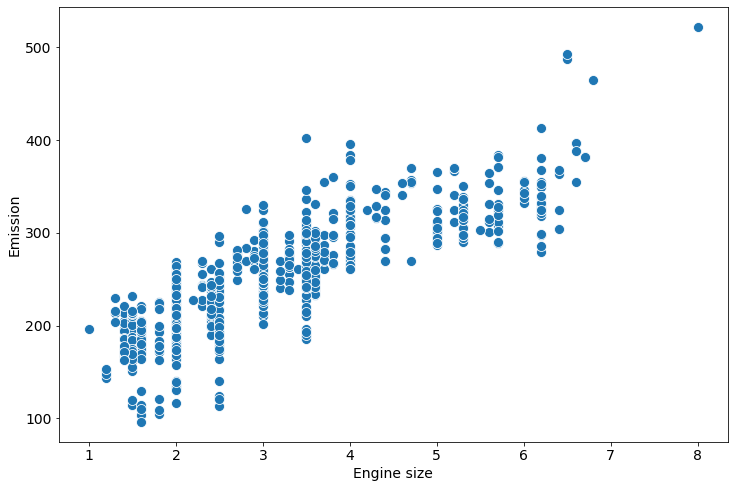

In [10]:
sns.scatterplot(x = 'Engine-Size' , y = 'CO2-Emissions' ,s=100 , data = df);
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

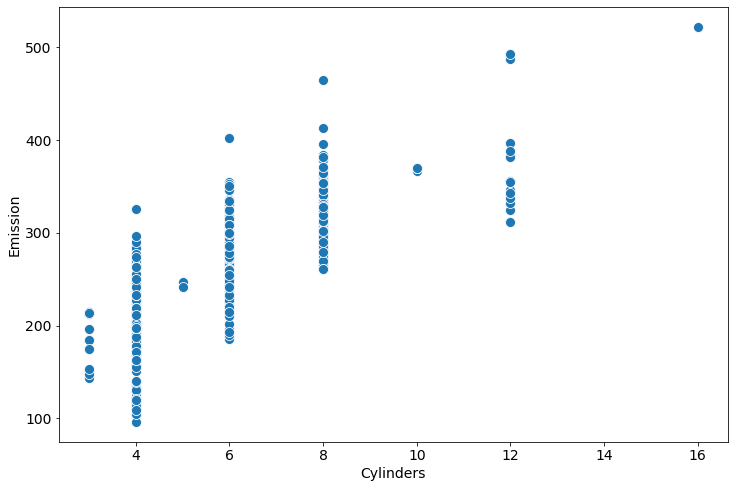

In [11]:
sns.scatterplot(x = 'Cylinders', y = 'CO2-Emissions' ,s=100 , data = df);
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:


In [12]:
msk = np.random.rand(len(df)) < 0.8
train = select_df[msk]
test = select_df[~msk]

#### Modeling

Using sklearn package to model data.

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine-Size']])
train_y = np.asanyarray(train[['CO2-Emissions']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[36.53495394]]
Intercept:  [138.05820035]


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.


We can plot the fit line over the data:

Text(0, 0.5, 'Emission')

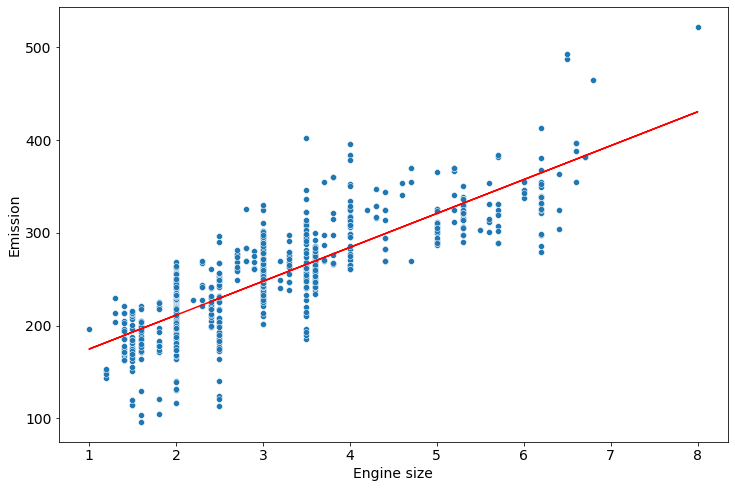

In [14]:
sns.scatterplot(x ='Engine-Size', y= 'CO2-Emissions',data = train)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [15]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine-Size']])
test_y = np.asanyarray(test[['CO2-Emissions']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.08
Residual sum of squares (MSE): 860.58
R2-score: 0.73


Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe


In [16]:
train_x = train[["Fuel-Consumption-Comb"]]

test_x = test[["Fuel-Consumption-Comb"]]


Now train a Linear Regression Model using the `train_x` you created and the `train_y` created previously

In [17]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

Find the predictions using the model's `predict` function and the `test_x` data

In [18]:
predictions =regr.predict(test_x)

Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously


In [19]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 11.27


# Multiple Linear Regression

## Objectives


*   Use scikit-learn to implement Multiple Linear Regression
*   Create a model, train it, test it and use the model

Selecting some features that we want to use for regression.

In [20]:
select_df2 = df[['Engine-Size','Cylinders','Fuel-Consumption-City','Fuel-Consumption-Hwy','Fuel-Consumption-Comb','CO2-Emissions']]

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  **np.random.rand()** function

In [21]:
msk = np.random.rand(len(df)) < 0.8
train1 = select_df2[msk]
test1 = select_df2[~msk]

When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train1[['Engine-Size','Cylinders','Fuel-Consumption-Comb']])
y = np.asanyarray(train1[['CO2-Emissions']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 4.43829918  4.07483259 15.77699376]]


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Prediction</h2>

In [23]:
y_hat= regr.predict(test1[['Engine-Size','Cylinders','Fuel-Consumption-Comb']])
x = np.asanyarray(test1[['Engine-Size','Cylinders','Fuel-Consumption-Comb']])
y = np.asanyarray(test1[['CO2-Emissions']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 347.05
Variance score: 0.91


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Explained variance regression score:**\
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
The best possible score is 1.0, the lower values are worse.

 This time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy? 

In [24]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train1[['Engine-Size','Cylinders','Fuel-Consumption-City','Fuel-Consumption-Hwy']])
y = np.asanyarray(train1[['CO2-Emissions']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test1[['Engine-Size','Cylinders','Fuel-Consumption-City','Fuel-Consumption-Hwy']])
x = np.asanyarray(test1[['Engine-Size','Cylinders','Fuel-Consumption-City','Fuel-Consumption-Hwy']])
y = np.asanyarray(test1[['CO2-Emissions']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[4.51720316 4.01332834 8.66935496 7.10095174]]
Residual sum of squares: 351.55
Variance score: 0.91


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<h2 id="polynomial_regression">Polynomial regression</h2>

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:


In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Engine-Size']])
train_y = np.asanyarray(train[['CO2-Emissions']])

test_x = np.asanyarray(test[['Engine-Size']])
test_y = np.asanyarray(test[['CO2-Emissions']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.  ,  9.  ],
       ...,
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example is displayed below.

$$
\begin{bmatrix}
v\_1\\\\
v\_2\\
\vdots\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
\[ 1 & v\_1 & v\_1^2]\\
\[ 1 & v\_2 & v\_2^2]\\
\vdots & \vdots & \vdots\\
\[ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
2.\\
2.4\\
1.5\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
\[ 1 & 2. & 4.]\\
\[ 1 & 2.4 & 5.76]\\
\[ 1 & 1.5 & 2.25]\\
\vdots & \vdots & \vdots\\
\end{bmatrix}
$$

It looks like feature sets for multiple linear regression analysis, right? Yes. It Does.
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x\_1$, $x\_1^2$ with $x\_2$, and so on. Then the 2nd degree equation would be turn into:

$$y = b + \theta\_1  x\_1 + \theta\_2 x\_2$$

Now, we can deal with it as a 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such problems.

so we can use **LinearRegression()** function to solve it:

In [26]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         53.84735572 -2.34913635]]
Intercept:  [111.05933679]


As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit curvy line.
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

Text(0, 0.5, 'Emission')

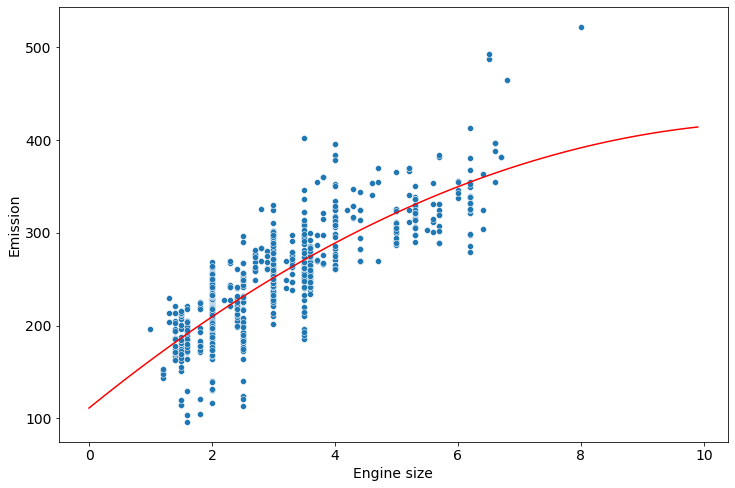

In [27]:
sns.scatterplot(x ='Engine-Size', y= 'CO2-Emissions',data = train)
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluation</h2>

In [28]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 22.31
Residual sum of squares (MSE): 802.20
R2-score: 0.75


 This time with degree three (cubic). Does it result in better accuracy?

Coefficients:  [[  0.         118.59779146 -21.05679621   1.62018733]]
Intercept:  [44.78260408]
Mean absolute error: 21.67
Residual sum of squares (MSE): 807.79
R2-score: 0.75


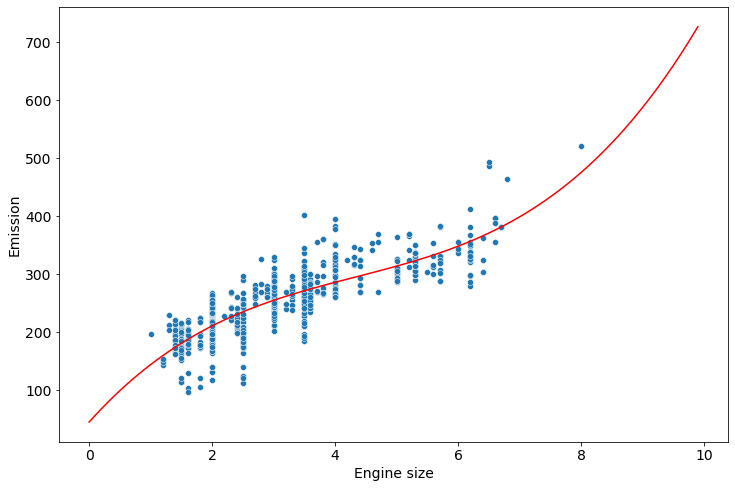

In [29]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
sns.scatterplot(x ='Engine-Size', y= 'CO2-Emissions',data = train)
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )